# Part1 Chpater03_05 데이터 선별

## 1. 데이터 샘플 확인하기
- 어노테이션 파일을 불러오고 형식을 확인한다.
- [데이터 설명 링크](https://google.github.io/cartoonset/download.html)

In [1]:
import os
import pandas as pd

'''
    어노테이션 파일을 불러온다.
'''

data_root = '../part1_chapter03_05'
origin_df_list = [] # 어노테이션 데이터 프레임 저장
image_filename_list = [] # 이미지 파일명 저장
for filename in os.listdir(data_root):
    if filename.endswith('.csv'): ## 확장자가 csv인 파일 검사
        filepath = os.path.join(data_root, filename)
        image_filename = filename.replace('.csv', '.png')
        origin_df = pd.read_csv(filepath)
        
        origin_df_list.append(pd.read_csv(filepath))
        image_filename_list.append(image_filename)
        
print(image_filename_list[0])
origin_df_list[0].head()


cs10571477962556972748.png


,eye_angle,1,3
0,eye_lashes,0,2
1,eye_lid,0,2
2,chin_length,1,3
3,eyebrow_weight,1,2
4,eyebrow_shape,1,14


In [2]:
print(len(origin_df_list))

10000


# 2. 어노테이션 형식 변환

In [3]:
'''
    데이터의 속성을 전부 출력
'''

tmp_df = origin_df_list[0].copy()
tmp_df.columns = ['name', 'val', 'varients'] # 컬럼 이름 설정
all_columns = tmp_df['name'].unique().tolist() # 전체 카테고리 추출
print(all_columns) 

['eye_lashes', 'eye_lid', 'chin_length', 'eyebrow_weight', 'eyebrow_shape', 'eyebrow_thickness', 'face_shape', 'facial_hair', 'hair', 'eye_color', 'face_color', 'hair_color', 'glasses', 'glasses_color', 'eye_slant', 'eyebrow_width', 'eye_eyebrow_distance']


In [4]:
'''
    확인할 카테고리를 설정하여 신규 데이터프레임을 선언한다.
'''
columns = ['filename', 'glasses', 'eye_color', 'eyebrow_width']
new_df = pd.DataFrame(columns=columns)
new_df.head()

,filename,glasses,eye_color,eyebrow_width


In [5]:
for row_idx, origin_df in enumerate(origin_df_list):
    filename = image_filename_list[row_idx]
    origin_df.columns = ['name', 'val', 'varients']
    new_row = { ## 신규 데이터프레임에 삽입할 row 데이터
        'filename': filename ## 이미지 파일 이름을 저장한다.
    }
    for idx, row in origin_df.iterrows():
        if row['name'] in columns: # 사용하고자 하는 카테고리와 일치할 경우 데이터를 저장한다.
            new_row[row['name']] = row['val'] 
    new_df.loc[row_idx] = new_row

In [6]:
new_df.head()

,filename,glasses,eye_color,eyebrow_width
0,cs10571477962556972748.png,11,2,1
1,cs1095648866193362889.png,11,3,0
2,cs10427326072037739745.png,4,0,1
3,cs10419454717692364619.png,8,2,1
4,cs10423413340727302718.png,11,4,1


In [7]:
print(f"원본 데이터의 개수 : {len(origin_df_list)}")
print(f"변환한 데이터의 개수 : {len(new_df)}")

원본 데이터의 개수 : 10000
변환한 데이터의 개수 : 10000


In [12]:
## 각 카테고리의 최대 값
new_df.max()

filename         cs11501981190804367864.png
glasses                                  11
eye_color                                 4
eyebrow_width                             2
dtype: object

In [13]:
max_categories = []
for col in new_df.columns[1:]: ## filename 컬럼은 제외
    max_categories.append(new_df[col].max())
max_categories

[11, 4, 2]

# 3. 데이터 시각화
- 클래스별 데이터 샘플을 시각화 한다.

In [36]:
import matplotlib.pyplot as plt
'''
    이미지 시각화 함수를 정의한다. 
'''

def draw_images(images, classes):
    '''
        :param images: cv2(ndarray) 이미지 리스트
        :param classes: 클래스 리스트
        :return: None 
    '''
    # 1 x len(images)의 그리드 생성 (바둑판 이미지 틀 생성)
    fig, axs = plt.subplots(1, len(images), figsize=(16, 5))
    
    # 각 하위 그래프에 이미지 출력
    for i, ax in enumerate(axs.flat):
        ax.imshow(images[i]) # 이미지를 바둑판에 출력
        ax.set_title(classes[i]) # 클래스 이름으로 이미지 제목 생성 
        ax.axis('off') # 축 숨기기
    
    plt.tight_layout()
    plt.show()

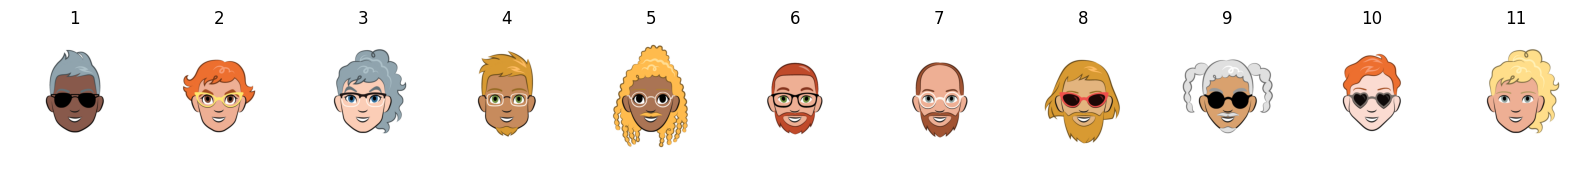

In [39]:
from PIL import Image

new_df = new_df.sample(frac=1).reset_index(drop=True)
## columns = ['glasses', 'eye_color', 'eyebrow_width']
find_class = 'glasses' ## 찾고자 하는 클래스 이름

image_list = []
class_list = []

max_val = new_df[find_class].max() # 클래스의 최대값 추출
for val in range(1, max_val+1): # [1 ~ max_val] 값 루프
    val_df = new_df[new_df[find_class] == val] ## 각 카테고리 값마다 데이터프레임 추출
    class_list.append(val)

    filename = val_df.iloc[0]['filename'] ## 첫번째 파일만 불러옴
    image = Image.open(os.path.join(data_root, filename)).convert('RGB') ## png 이미지를 rgb 형식으로 바꿈
    image.resize((128, 128)) ## 이미지 크기 조절
    image_list.append(image)

draw_images(image_list, class_list)


# 4. 신규 데이터프레임 저장

In [40]:
save_path = './new_annotations.csv'
new_df.to_csv(save_path, index=False)
